<h2 style="text-align: left; color: SlateGray;\" markdown="3">Pós-Graduação em Sensoriamento Remoto (Mestrado)<br>
SER-347 - Introdução à Programação para Sensoriamento Remoto<br>
Trabalho de Conclusão de Disciplina</h2>
<hr style=\"border:2px solid #0077b9;\">
<h2 style="text-align: center; font-variant: small-caps;">Análise da variabilidade espaço-temporal do fenômeno de ilhas
de calor urbano na cidade de Fortaleza/CE</h2>

<p style="text-align: center;">Marcelo Cardoso da Silva Bandoria¹, Rafael Duarte Viana¹</p>

<p style="text-align: center;">¹Instituto Nacional de Pesquisas Espaciais - INPE<br/>
Caixa Postal 515 - 12227-010 - São José dos Campos - SP, Brasil<br/>
{marcelo.bandoria,rafael.viana}@inpe.br</p>

### 1. INTRODUÇÃO
<p style="text-align: justify;">Nas últimas décadas, os rápidos desenvolvimentos urbanos em escala global trouxeram muitos efeitos adversos ao ambiente como um todo, sobretudo ao clima, diretamente proporcional ao aumento dos estudos sobre as mudanças climáticas globais e seus efeitos na superfície, além do aspecto social e efeitos diretos na saúde da população que vive em áreas densamente povoadas. Dentre tantos problemas, destacamos neste trabalho um dos mais conhecidos chamado efeito “ilha de calor urbana” (UHI), que pode ser descrito como um fenômeno em que as temperaturas nas áreas urbanas são mais altas do que nas áreas rurais próximas.</p>
<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;A possibilidade de estudar tal fenômeno baseado em sensoriamento remoto revelou bons resultados pois as “ilhas de calor” (UHI) tem propriedades diurnas e sazonais evidentes, assim baseado em temperaturas de superfície terrestre (LST) derivados de dados NOAA AVHRR, Streutker (2002) descobriu-se que o a magnitude do (UHI) noturno no Texas, Houston, foi correlacionada com a temperatura da superfície rural (RST). (Ji Zhou, et.al, 2010)(LI et al., 2018)</p>
<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;No entanto, diferente conclusão, foi feita quando o número de imagens foi aumentado. Dessa forma surge a necessidade de se utilizar grandes quantidades de informações espaço-temporais para verificar a distribuição da temperatura na superfície e seu comportamento durante certo intervalo de tempo para atender ao planejamento urbano e o desenvolvimento administrativo dos recursos naturais e sociais da população.</p>
<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;O objetivo deste trabalho é investigar as relações entre o UHI magnitude na área metropolitana de Fortaleza e o RST próximo baseado em temperaturas de superfície terrestre (LST) derivadas da série temporal Terra/Aqua MODIS data durante o período de  XXXX, correlacionando dados de dia e noite e comparando-os para XXXX.</p>
<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;Diversos estudos evidenciam que obter a variação sazonal desse parâmetro de temperatura, cruzando com dados de vegetação em escala adequada pode ser uma ferramenta poderosa para a tomada de decisão no desenvolvimento territorial e que afetam diretamente na vida da população em diversos aspectos da saúde e qualidade de vida em geral.<p>


## 2. DADOS E MÉTODOS

### 2.1 Área de Estudo

<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;A primeira parte do trabalho se constituiu na organização dos pacotes e dos diretórios onde seriam armazenados os dados, as figuras e os resultados. A Tabela 1 indica quais pacotes foram utilizados para todo o programa.<p>

<table>
     <caption  style="text-align: center;">Tabela 1: Pacotes Python utilizados no programa</caption>
    <thead>
        <tr>
            <th style="text-align: center;">Tipo do Pacote</th>
            <th style="text-align: center;">Sist. Oper.</th>
            <th style="text-align: center;">Numérica</th>
            <th style="text-align: center;">Espaciais</th>            
            <th style="text-align: center;">Gráficas</th>            
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center;">Nome do Pacote</td>
            <td style="text-align: center;">os<br />calendar</td>
            <td style="text-align: center;">Numpy<br />Pandas<br />SciPy</td>
            <td style="text-align: center;">GDAL<br />PyPROJ<br />Fiona</td>
            <td style="text-align: center;">MatPlotLib<br />descartes</td>
        </tr>
    </tbody>
</table>

In [2]:
"""-------------------------------------------------------------
    IMPORTAÇÃO DE BIBLIOTECAS
-------------------------------------------------------------"""
# Bibliotecas OS
import os
import calendar

# Bibliotecas Numéricas
import numpy as np
import pandas as pd
from collections import OrderedDict
from scipy.ndimage import zoom

# Bibliotecas Geográficas
from osgeo import gdal
from pyproj import Proj, transform
import fiona

# Bibliotecas Gráficas
import matplotlib.pyplot as plt
from descartes import PolygonPatch

# Bibliotecas Extras
from pymodis import downmodis

"""-------------------------------------------------------------
    CONFIGURAÇÃO DOS DIRETÓRIOS DE TRABALHO
-------------------------------------------------------------"""
# Adquire o diretório onde o notebook está armazenado
BASE_DIR = os.getcwd()
# Cria o caminho para armazenar os dados, as figuras e os resultados
DATA_DIR = os.path.join(BASE_DIR,'data')
IMGS_DIR = os.path.join(BASE_DIR,'imgs')
RESU_DIR = os.path.join(BASE_DIR,'output')

<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;A área de estudo corresponde ao município de Fortaleza, estado do Ceará, localizada na região do nordeste brasileiro com coordenadas geográficas variando entre 3°43′S à 3°56′S e 38°22′W à 38°32′W. Ela possui clima tropical, com verão úmido e inverno seco, e é classificada como Aw de acordo com a classificação climática de Köppen e Geiger. A sua temperatura média anual em Fortaleza é 26.3 °C e pluviosidade média anual de 1448 mm. No mês de Novembro há o registro do mês mais quente do ano e Julho é o mês com a mais baixa temperatura ao longo do ano.<p>

 <figure>
   <img src="imgs/area/fortaleza.jpg" alt="Fortaleza-CE" width="640">
   <figcaption style="text-align: center;">Fig 1. - Uma visão da área de Fortaleza/CE.</figcaption>
</figure> 

<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;Neste estudo, a análise será realizada sobre uma grade de 0.4° X 0.4° que engloba a região da área do município e vizinhanças. A escolha é parcialmente porque este recorte inclui um número adequado de pixels correspondente a área urbana e cobertura predominante nos entornos do município. Os pixels correspondentes a água foram excluídos da análise. O período de análise será de janeiro de 2003 à dezembro de 2012, constituindo uma série temporal de 10 anos.</p>

In [20]:
"""-------------------------------------------------------------
    CONFIGURAÇÃO DO RECORTE ESPACIAL
-------------------------------------------------------------"""
# Configuração do recorte espacial da análise
lat_max = -3.6
lat_min = lat_max - 0.4
lon_min = -38.75
lon_max = lon_min + 0.4

"""-------------------------------------------------------------
    CONFIGURAÇÃO DO RECORTE TEMPORAL
-------------------------------------------------------------"""
# Configuração do período temporal da análise
# Para ilustração em sala, será usado apenas o mês 09/2003
mes_inicio  = 9
ano_inicio  = 2003
mes_final   = 9
ano_final   = 2003

"""-------------------------------------------------------------
    RECORTE DO SHAPEFILE DE FORTALEZA
-------------------------------------------------------------"""
with fiona.open("data/shapes/Ceara_Municipios.shp", "r") as shapefile:
    # Número de feições
    for feature in shapefile:
        if feature['properties']['NOMEMUNI'] == "FORTALEZA":
            f = feature['geometry']

### 2.2 Dados

##### (a) Dados de LST do MODIS

<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;O instrumento MODIS está a bordo dos satélites Aqua e Terra. O satélite Terra adquire imagens às 10:30 e 22:30h no horário solar local, enquanto o satélite Aqua adquire imagens às 1:30 e 13:30h. Para este estudo, foram utilizados os produtos de 8-dias de LST/Emissividade do MODIS Terra/Aqua (MOD11A2 e MYD11A2, respectivamente) nas versões V006 durante o período entre 2003-2012 para caracterizar a SHUIs. A resolução da LST é de 1000m. As medidas utilizadas nesse estudo foram reamostradas para uma resolução de 500m, utilizando o método do vizinho mais próximo, e realizada uma média mensal dos valores. Apenas pixels adquiridos em dias de céu limpo foram utilizados.</p>

In [5]:
# Configuração dos satélites
satelite = ["terra", "aqua"]
# Período da análise
periodo  = ["day" , "night"]

O download dos arquivos de LST foi realizado automaticamente atráves do uso do pacote <b>PyMODIS</b>, utilizando a rotina 1: 

In [24]:
"""-------------------------------------------------------------
    ROTINA 1: Download dos arquivos de LST
-------------------------------------------------------------"""

# Parâmetros para download do dado do MODIS
# Cena que contêm o município de Fortaleza
tiles = "h14v09"           
# Lista com o produto, o satelite e a pasta onde está localizado os arquivos no ftp
produto = ["MOD11A2.006","MYD11A2.006"]
pasta = ['MOLT','MOLA']
# Faz a leitura do login e senha armazenado em um arquivo
with open("data/login_senha.txt") as f:
    info = f.readlines()
f.close()
# Armazena as informações de usuario e senha
usuario = info[0][:-1]
senha = info[1][:-1]

# Faz o download 
for year in range(ano_inicio, ano_final + 1):
    for month in range(mes_inicio, mes_final + 1):
        for i in range(0, 2):
            dia_final   = "%04d.%02d.%02d" % (year, month, calendar.monthrange(year, month)[1])
            dia_inicial = "%04d.%02d.01" % (year, month)

            # Cria o diretório para armazenar as imagens
            destino = os.path.join(BASE_DIR,"data/lst/%s/%04d/%02d" % (satelite[i],year,month))

            if not os.path.isdir(destino):
                os.makedirs(destino)

            # Cria uma classe de download do MODIS, conecta e faz o download
            modis_down = downmodis.downModis(password=senha, user=usuario, destinationFolder=destino, path=pasta[i],\
                                         tiles=tiles, today=dia_final, enddate=dia_inicial, product=produto[i])
            modis_down.connect()
            modis_down.downloadsAllDay()

##### (b) Dados de Cobertura de Solo do MODIS

<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;Dados anuais de cobertura de solo também são disponibilizados como um produto do MODIS (MCD12Q1, versão V006), com resolução espacial de 500m, e serão utilizados neste trabalho para identificação de pixels urbanos e rurais. O produto utiliza uma classificação contento dezesseis tipos de cobertura de solo, conforme indicado na Tabela 2.</p>

<table>
     <caption  style="text-align: center;">Tabela 2: Tipos de Cobertura de Solo</caption>
    <thead>
        <tr>
            <th style="text-align: center;">Número</th>
            <th style="text-align: center;">Tipo de Cobertura</th>
        </tr>
    </thead>
    <tbody>
        <tr><td style="text-align: center;">1</td>
            <td style="text-align: center;">Floresta perene composta por vegetação acicufoliada</td></tr>
        <tr><td style="text-align: center;">2</td>
            <td style="text-align: center;">Floresta perene composta por vegetação latifoliada</td></tr>
        <tr><td style="text-align: center;">3</td>
            <td style="text-align: center;">Floresta decidual composta por vegetação acicufoliada</td></tr>
        <tr><td style="text-align: center;">4</td>
            <td style="text-align: center;">Floresta decidual composta por vegetação latifoliada</td></tr>
        <tr><td style="text-align: center;">5</td>
            <td style="text-align: center;">Floresta mista</td></tr>
        <tr><td style="text-align: center;">6</td>
            <td style="text-align: center;">Área composta por arbustos cujas copas se sobrepõem</td></tr>
        <tr><td style="text-align: center;">7</td>
            <td style="text-align: center;">Área composta por arbustos cujas copas não se sobrepõem</td></tr>
        <tr><td style="text-align: center;">8</td>
            <td style="text-align: center;">Savana arborizada</td></tr>
        <tr><td style="text-align: center;">9</td>
            <td style="text-align: center;">Savana (Pastagem)</td></tr>
        <tr><td style="text-align: center;">10</td>
            <td style="text-align: center;">Vegetação herbácea</td></tr>
        <tr><td style="text-align: center;">11</td>
            <td style="text-align: center;">Áreas úmidas permanentes</td></tr>
        <tr><td style="text-align: center;">12</td>
            <td style="text-align: center;">Terras agrícolas</td></tr>
        <tr><td style="text-align: center;">13</td>
            <td style="text-align: center; color: red;">Área Urbana</td></tr>
        <tr><td style="text-align: center;">14</td>
            <td style="text-align: center;">Terras cultivadas</td></tr>
        <tr><td style="text-align: center;">15</td>
            <td style="text-align: center;">Gelo e neve</td></tr>
        <tr><td style="text-align: center;">16</td>
            <td style="text-align: center;">Vegetação estéril ou escassa (solo exposto)</td></tr>
        <tr><td style="text-align: center;">17</td>
            <td style="text-align: center;">Água</td></tr>
    </tbody>
</table>

O download dos arquivos de Cobertura de Solo, assim como para o LST, foi realizado automaticamente atráves do uso do pacote <b>PyMODIS</b>, utilizando a rotina 2: 

In [33]:
"""-------------------------------------------------------------
    ROTINA 2: Download dos arquivos de LC (Cobertura de Solo)
-------------------------------------------------------------"""

# Parâmetros para download do dado do MODIS
# Cena que contêm o município de Fortaleza
tiles = "h14v09"           
# Lista com o produto, o satelite e a pasta onde está localizado os arquivos no ftp
produto = "MCD12Q1.006"
pasta = "MOTA"
# Faz a leitura do login e senha armazenado em um arquivo
with open("data/login_senha.txt") as f:
    info = f.readlines()
f.close()
# Armazena as informações de usuario e senha
usuario = info[0][:-1]
senha = info[1][:-1]

# Faz o download 
for year in range(ano_inicio, ano_final + 1):
    for month in range(mes_inicio, mes_final + 1):
        dia_final   = "%04d.12.31" % (year)
        dia_inicial = "%04d.01.01" % (year)

        # Cria o diretório para armazenar as imagens
        destino = os.path.join(BASE_DIR,"data/landcover")

        if not os.path.isdir(destino):
            os.makedirs(destino)

        # Cria uma classe de download do MODIS, conecta e faz o download
        modis_down = downmodis.downModis(password=senha, user=usuario, destinationFolder=destino, path=pasta,\
                                         tiles=tiles, today=dia_final, enddate=dia_inicial, product=produto)
        modis_down.connect()
        modis_down.downloadsAllDay()

### 2.3 Método

##### (a) Normalização dos dados de LST

<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;Neste estudo, utilizaremos uma escala de razão normalizada (NRS, do inglês <em>normalized ratio scale</em>) que normaliza o valor de cada pixel baseado em uma razão para poder comparar imagens de LST obtidas em diferentes períodos, mantendo simultaneamente os seus valores originais. Esta técnica foi proposta por Rasul (2017) e compara o valor real de cada pixel com a cena inteira, então compara os valores de diferentes imagens. A equação é dada por:</p>

\begin{equation*} 
  LST_{NRS} = \frac{(LST)}{\sqrt{\sum{(LST)^2}}}
\end{equation*}
<br />
<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;Para obter valores similares aos valores originais de $LST$, multiplica-se $LST_{NRS}$ pelo resultado da equação:</p>
<br />
\begin{equation*} 
  N = \frac{média(LST)}{média(LST_{NRS})}
\end{equation*}

In [6]:
def nrs_scale(original_lst):
    # Constroi o denominador
    square = original_lst ** 2
    sum_square = np.nansum(square)
    new_lst = original_lst / (sum_square ** 0.5)

    N = np.nanmean(original_lst) / np.nanmean(new_lst)

    output_lst = N * new_lst

    return output_lst

##### (b) Cálculo do Índice de Ilha de Calor Urbano de Superfície (Skin UHI)

<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;Neste estudo, utilizaremos o índice proposto por Jin (2012) para estimar a Ilha de Calor Urbano de Superfície, utilizando a equação:</p>
<br />
\begin{equation*} 
  UHI_{skin} = T_{skin;u} - T_{skin;r(LC)}
\end{equation*}
<br />
<p style="text-align: justify;">onde $UHI_{skin}$ é o índice de Ilha de Calor Urbano a nível de superfície (<em>skin</em>), $T_{skin;u}$ é a média da temperatura de todos os pixels urbanos para uma dada região, e $T_{skin;r(LC)}$ é a média da termperatura de superfície de todos os pixels rurais na região para uma cobertura de solo específica (LC). Normalmente, para ser consistente com o índice de UHI à 2m, a cobertura de terras cultivadas é selecionada quando disponível como área rural a ser comparada. Contudo, para algumas cidades, não há cobertura suficiente e entao é necessária que outro tipo de cobertura seja utilizado para o cálculo do índice.</p>

In [8]:
def suhi_index(lst_array, lc_array):
    # Parâmetros de entrada:
    # lst_array = matriz de formato (x,y) com valores de LST
    # lc_array = matriz de formato (x,y) com valores de LC
    
    # Recorta os pixels que apresenta cobertura urbana (lc = 13)
    index_urban = lc_array == 13
    # Calcula a média dos valores desses pixels
    mean_lst_urban = np.nanmean(lst_array[index_urban])

    # Cria uma lista para armazenar cada valor de cobertura, removendo a área urbana
    lc_types = [x for x in range(0,17)]
    lc_types.remove(13)

    # Inicializa uma lista vazia para armazenar os valores dos indices
    shui_value= []

    # Para cada valor de cobertura do solo...
    for lc in lc_types:
        # ... Recorta os pixels daquela cobertura na área ...
        index_urban = lc_array == lc
        # ... Calcula a média da LST dos pixels ...
        mean_lst_lc = np.nanmean(lst_array[index_urban])
        # ... Calcula o índice SUHI ...
        suhi = mean_lst_urban - mean_lst_lc
        suhi_value.append(suhi)

    return suhi_value

##### (c) Armazenamento dos resultados

<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;O programa então irá calcular valores mensais do $UHI_{skin}$, para o recorte temporal e espacial selecionado. Para armazernar os valores de SUHI, será utilizado um DataFrame. Então, será iniciado um objeto DataFrame vazio:</p>

In [10]:
"""-------------------------------------------------------------
    INICIALIZAÇÃO DE DATAFRAME PARA SUHI
-------------------------------------------------------------"""
DICT = {'YEAR':[], 'MONTH':[], 'DAY':[], 'SATELLITE':[], 'PERIOD':[],
        'LC_0':[], 'LC_1':[], 'LC_2':[], 'LC_3':[], 'LC_4':[], 'LC_5':[],
        'LC_6':[], 'LC_7':[], 'LC_8':[], 'LC_9':[], 'LC_10':[],
        'LC_11':[], 'LC_12':[], 'LC_14':[], 'LC_15':[], 'LC_16':[],
    }

SUHI = pd.DataFrame(OrderedDict(DICT))
# Indice do primeiro registro a ser adicionado no DF
index_df = 0
# Imprime o DF
SUHI

,YEAR,MONTH,DAY,SATELLITE,PERIOD,LC_0,LC_1,LC_2,LC_3,LC_4,...,LC_6,LC_7,LC_8,LC_9,LC_10,LC_11,LC_12,LC_14,LC_15,LC_16


<p style="text-align: justify;">e a cada iteração do programa será adicionado uma nova linha contendo os índices para cada cobertura.</p>

##### (d) Programa principal

<p style="text-align: justify;">&nbsp;&nbsp;&nbsp;&nbsp;Inicialmente se faz a leitura dos dados de Cobertura de Solo:</p>

In [34]:
"""-------------------------------------------------------------
    PROGRAMA PRINCIPAL
-------------------------------------------------------------"""
# Lê os arquivos de Cobertura de Solo e os organiza por lista
MODIS_LC_FILES = os.listdir(path=os.path.join(DATA_DIR, 'landcover'))
MODIS_LC_FILES.sort()

# Procedimento para remover os arquivos que acompanharam os dados hdf de cobertura de solo
COUNT_FILE = MODIS_LC_FILES.copy()
for file in COUNT_FILE:
    if file[-3:] != "hdf":
        MODIS_LC_FILES.remove(file)

<p style="text-align: justify;">Para cada ano de dados de cobertura, é feito a leitura do raster e se obtêm a matriz de valores de cobertura de solo. A partir das informações geográficas do raster, é feita uma reprojeção do sistema de referência Sinusoidal para o sistema de referência WGS84. É feito então um recorte da área de estudo a partir do recorte espacial.</p>

In [18]:
for file in MODIS_LC_FILES:
    year = int(file[9:13])
    
    # Realiza a leitura da Cobertura de Solo
    lc_fname = os.path.join(DATA_DIR, 'landcover', file)

    # Abertura do raster de Cobertura do Solo
    lc_raster = gdal.Open(gdal.Open(lc_fname, gdal.GA_ReadOnly).GetSubDatasets()[0][0], gdal.GA_ReadOnly)
    # Obtẽm os valores numéricos do raster
    lc_values = lc_raster.GetRasterBand(1).ReadAsArray()
    
    # Adquirindo as informações geográficas
    geo_lc = lc_raster.GetGeoTransform()
    latitude = geo_lc[3]        # latitude do canto superior esquerda
    longitude = geo_lc[0]       # longitude do canto superior esquerda
    resolucao = geo_lc[1]       # resolução do pixel

    # Inicializa matrizes para armazerar as coordenadas sinusiodais
    lon_sin = np.zeros((lc_raster.RasterXSize, lc_raster.RasterYSize))
    lat_sin = np.zeros((lc_raster.RasterXSize, lc_raster.RasterYSize))

    # Preenche a matriz com as coordenadas na projeção sinusiodal
    for row in range(lc_raster.RasterYSize):
        for col in range(lc_raster.RasterXSize):
            lon_sin[row, col] = longitude + col * resolucao
            lat_sin[row, col] = latitude - row * resolucao

    # Realiza a transformação das coordenadas de sinusiodal --> wgs84
    sinu = Proj("+proj=sinu +R=6371007.181 +nadgrids=@null +wktext")
    wgs84 = Proj("+init=EPSG:4326")
    lon_wgs,lat_wgs = transform(sinu,wgs84,lon_sin,lat_sin)

    # Realiza um recorte nos dados de acordo com a latitude e longitude informada
    ind = np.asarray(np.where((lat_wgs >= lat_min)
                              & (lat_wgs <= lat_max)
                              & (lon_wgs >= lon_min)
                              & (lon_wgs <= lon_max)))
    # Identifica os valores de max e min nas linhas e colunas, necessário para a criação da sub-matriz
    row_min = np.amin(ind[0, :])
    row_max = np.amax(ind[0, :]) + 1
    col_min = np.amin(ind[1, :])
    col_max = np.amax(ind[1, :]) + 1

    indices = (row_min, row_max, col_min, col_max)

    crop_lat_lc    = np.array(lat_wgs[row_min:row_max, col_min:col_max])
    crop_lon_lc    = np.array(lon_wgs[row_min:row_max, col_min:col_max])
    crop_values_lc = np.array(lc_values[row_min:row_max, col_min:col_max])


<p style="text-align: justify;">Uma vez realizada a transformação das coordenadas e o recorte, o dado de cobertura de solo pode ser visualizado.</p>

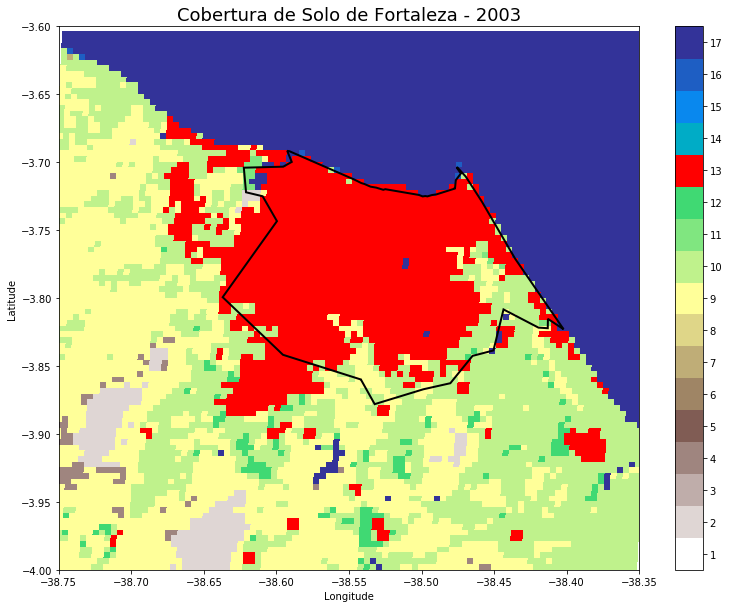

In [33]:
# Cria diretórios para armazenar a figura
fig_dir   = os.path.join(IMGS_DIR,'landcover')
fig_fname = os.path.join(fig_dir,'landcover_{}'.format(year))

if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)

# Define um colormap discretizado
cmap = plt.get_cmap('terrain_r', 17)
# Extrai todas as cores do colormap para uma lista
cmaplist = [cmap(i) for i in range(cmap.N)]
# Força a entrada (12, área urbana) a ser vermelha
cmaplist[12] = (1.0,0.0,0.0,1.0)
# Cria um novo cmap
cmap = cmap.from_list('Colormap customizado', cmaplist, cmap.N)

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
plt.pcolormesh(crop_lon_lc, crop_lat_lc, crop_values_lc, cmap=cmap, vmin = 0.5, vmax = 17 + 0.5)
plt.colorbar(ticks=np.arange(1,18))
plt.title("Cobertura de Solo de Fortaleza - {}".format(year), fontsize=18)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.ylim(lat_min, lat_max)
plt.xlim(lon_min, lon_max)
ax.add_patch(PolygonPatch(f, facecolor="none", edgecolor='k', linewidth=2))
plt.savefig(fig_fname, bbox_inches='tight')
plt.show()

<p style="text-align: justify;">Para avaliar qual a melhor cobertura de solo a ser utilizada no cálculo do índice, pode-se utilizar o histograma de pixels do recorte.</p>

In [35]:
# Obtêm um histograma com os valores de cobertura de solo
# Inicializa uma lista com os tipos de cobertura
lc_types = range(1,18)
# Inicializa uma lista pra armazenar o número de pixels do tipo de cobertura
lc_hist  = []

for value in lc_types:
    lc_total = (crop_values_lc == value).sum()
    lc_hist.append(lc_total)

# Obtêm o total de pixels na cena
lc_pixels = sum(lc_hist)
# Calcula o percentual de pixels para cada tipo de cobertura
lc_phist  = [(x * 100) / lc_pixels for x in lc_hist]

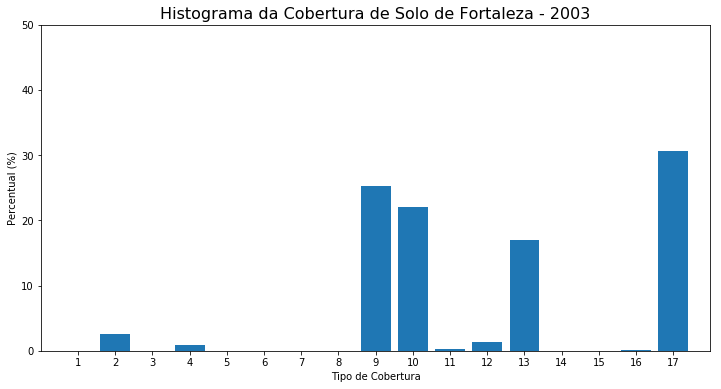

In [47]:
fig_name = os.path.join(fig_dir, 'landcover_{}_hist'.format(year))

## Plota o histograma com os dados
fig = plt.figure(figsize=(12, 6))
plt.bar(lc_types, lc_phist)
plt.title("Histograma da Cobertura de Solo de Fortaleza - {}".format(year), fontsize=16)
plt.ylim(0, 50)
plt.xlim(0, 18)
plt.xticks(np.arange(1, 18, 1))
plt.xlabel("Tipo de Cobertura")
plt.ylabel("Percentual (%)")
plt.savefig(fig_name, bbox_inches='tight')
plt.show()

Referências Bibliográficas

Ji, Z., Li, J, Yue, J. Analysis of urban heat island ( UHI ) in the beijing metropolitan area by time-series modis data. p. 3327–3330, 2010. 
Li, H. et al. Science of the Total Environment A new method to quantify surface urban heat island intensity. Science of the Total Environment, v. 624, p. 262–272, 2018. 